In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import torch
import torch.nn as nn
import torch_geometric
import torchvision.transforms as tr
from torch_geometric.data import Batch
from torch_geometric.loader import DataLoader

plt.style.use(hep.style.CMS)
plt.rcParams.update({"font.size": 20})

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# load the clic dataset
data_ = torch.load("../data/clic_edm4hep_2023_02_27/p8_ee_tt_ecm380/processed/data_0.pt")
print(f"Total data: {len(data_)}")

Total data: 10000


In [4]:
def distinguish_tracks_from_clusters(batch):
    """Takes an event~Batch() and splits it into two Batch() objects representing the tracks/clusters."""

    is_track = (batch.x[:, 0] == 1)
    is_cluster = (batch.x[:, 0] == 2)    

    tracks = Batch(
        x=batch.x[is_track],
        ygen=batch.ygen[is_track],
        ygen_id=batch.ygen_id[is_track],
        ycand=batch.ycand[is_track],
        ycand_id=batch.ycand_id[is_track],
        batch=batch.batch[is_track],
    )
    clusters = Batch(
        x=batch.x[is_cluster],
        ygen=batch.ygen[is_cluster],
        ygen_id=batch.ygen_id[is_cluster],
        ycand=batch.ycand[is_cluster],
        ycand_id=batch.ycand_id[is_cluster],
        batch=batch.batch[is_cluster],
    )

    return tracks, clusters

In [5]:
X_FEATURES_CL = {
    "type": 0,
    "et": 1,
    "eta": 2,
    "sin_phi": 3,
    "cos_phi": 4,
    "energy": 5,
    "position.x": 6,
    "position.y": 7,
    "position.z": 8,
    "iTheta": 9,
    "energy_ecal": 10,
    "energy_hcal": 11,
    "energy_other": 12,
    "num_hits": 13,
    "sigma_x": 14,
    "sigma_y": 15,
    "sigma_z": 16,
}

In [35]:
for i, ev in enumerate(loader):
    _, clusters = distinguish_tracks_from_clusters(ev)
    break

In [36]:
clusters

Batch(x=[923400, 17], ygen=[923400, 6], ygen_id=[923400], ycand=[923400, 6], ycand_id=[923400], batch=[923400])

In [60]:
is_any = (clusters.ygen_id!=-1)
is_not_null = (clusters.ygen_id!=0)
is_null = (clusters.ygen_id==0)
is_chhad = (clusters.ygen_id==1)
is_nhad = (clusters.ygen_id==2)
is_gamma = (clusters.ygen_id==3)
is_ele = (clusters.ygen_id==4)
is_mu = (clusters.ygen_id==5)

In [48]:
# number of clusters linked to a Null
(100*is_null.sum()/is_any.sum()).item()

51.699153900146484

In [47]:
# number of clusters linked to a charged hdadron
(100*is_chhad.sum()/is_any.sum()).item()

0.0

In [49]:
# number of clusters linked to a gamma
(100*is_gamma.sum()/is_any.sum()).item()

42.052738189697266

In [50]:
# number of nahdrons
(100*is_nhad.sum()/is_any.sum()).item()

6.248105049133301

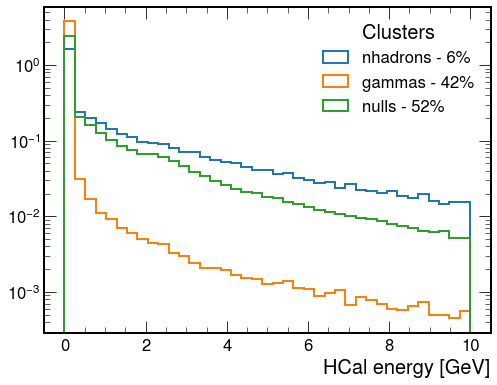

In [77]:
fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(0, 10, 40)
ax.hist(clusters.x[is_nhad][:, X_FEATURES_CL["energy_hcal"]], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True,
        label=f"nhadrons - {(100*is_nhad.sum()/is_any.sum()).item():.0f}%"        
       )
ax.hist(clusters.x[is_gamma][:, X_FEATURES_CL["energy_hcal"]], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True,
        label=f"gammas - {(100*is_gamma.sum()/is_any.sum()).item():.0f}%"        
       )
ax.hist(clusters.x[is_null][:, X_FEATURES_CL["energy_hcal"]], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True,
        label=f"nulls - {(100*is_null.sum()/is_any.sum()).item():.0f}%"        
       )

ax.legend(title="Clusters")
ax.set_xlabel("HCal energy [GeV]");
ax.set_yscale("log")
# ax.set_ylim(0, 25000)

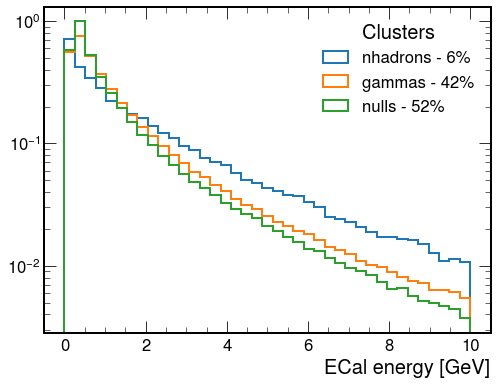

In [78]:
fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(0, 10, 40)
ax.hist(clusters.x[is_nhad][:, X_FEATURES_CL["energy_ecal"]], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True,
        label=f"nhadrons - {(100*is_nhad.sum()/is_any.sum()).item():.0f}%"        
       )
ax.hist(clusters.x[is_gamma][:, X_FEATURES_CL["energy_ecal"]], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True,
        label=f"gammas - {(100*is_gamma.sum()/is_any.sum()).item():.0f}%"        
       )
ax.hist(clusters.x[is_null][:, X_FEATURES_CL["energy_ecal"]], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True,
        label=f"nulls - {(100*is_null.sum()/is_any.sum()).item():.0f}%"        
       )

ax.legend(title="Clusters")
ax.set_xlabel("ECal energy [GeV]");
ax.set_yscale("log")
# ax.set_ylim(0, 25000)

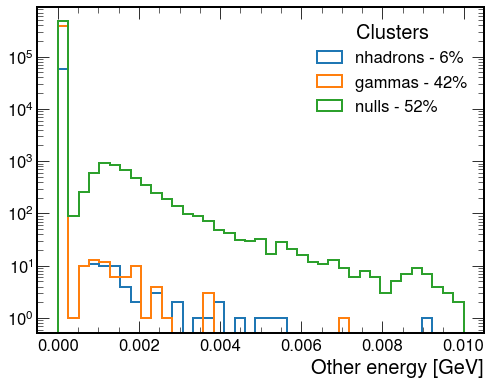

In [124]:
fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(0, 0.01, 40)
ax.hist(clusters.x[is_nhad][:, X_FEATURES_CL["energy_other"]], 
        bins, 
        histtype="step", 
        linewidth=2, 
#         density=True,
        label=f"nhadrons - {(100*is_nhad.sum()/is_any.sum()).item():.0f}%"        
       )
ax.hist(clusters.x[is_gamma][:, X_FEATURES_CL["energy_other"]], 
        bins, 
        histtype="step", 
        linewidth=2, 
#         density=True,
        label=f"gammas - {(100*is_gamma.sum()/is_any.sum()).item():.0f}%"        
       )
ax.hist(clusters.x[is_null][:, X_FEATURES_CL["energy_other"]], 
        bins, 
        histtype="step", 
        linewidth=2, 
#         density=True,
        label=f"nulls - {(100*is_null.sum()/is_any.sum()).item():.0f}%"        
       )

ax.legend(title="Clusters")
ax.set_xlabel("Other energy [GeV]");
ax.set_yscale("log")
# ax.set_ylim(0, 25000)

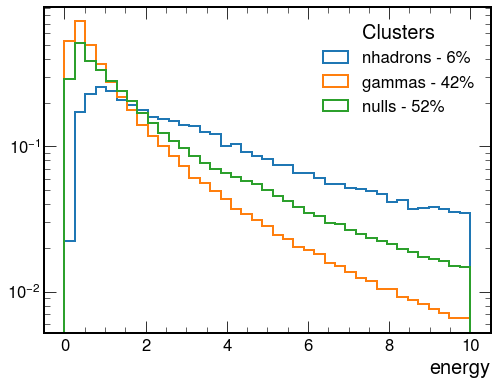

In [97]:
var_ = "energy"

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(0, 10, 40)
ax.hist(clusters.x[is_nhad][:, X_FEATURES_CL[var_]], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True,
        label=f"nhadrons - {(100*is_nhad.sum()/is_any.sum()).item():.0f}%"        
       )
ax.hist(clusters.x[is_gamma][:, X_FEATURES_CL[var_]], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True,
        label=f"gammas - {(100*is_gamma.sum()/is_any.sum()).item():.0f}%"        
       )
ax.hist(clusters.x[is_null][:, X_FEATURES_CL[var_]], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True,
        label=f"nulls - {(100*is_null.sum()/is_any.sum()).item():.0f}%"        
       )

ax.legend(title="Clusters")
ax.set_xlabel(var_);
ax.set_yscale("log")
# ax.set_ylim(0, 25000)

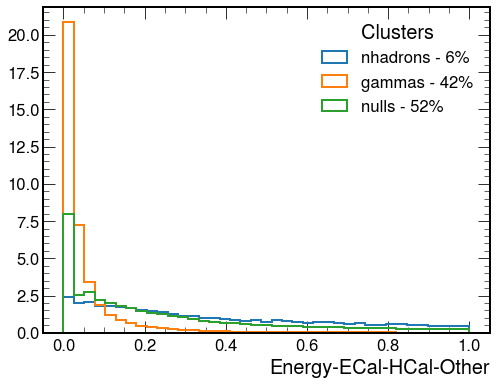

In [126]:
# energy - ECAL - HCAL
fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(0, 1, 40)
ax.hist(clusters.x[is_nhad][:, X_FEATURES_CL["energy"]]-clusters.x[is_nhad][:, X_FEATURES_CL["energy_hcal"]]-clusters.x[is_nhad][:, X_FEATURES_CL["energy_ecal"]]-clusters.x[is_nhad][:, X_FEATURES_CL["energy_other"]], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True,
        label=f"nhadrons - {(100*is_nhad.sum()/is_any.sum()).item():.0f}%"        
       )
ax.hist(clusters.x[is_gamma][:, X_FEATURES_CL["energy"]]-clusters.x[is_gamma][:, X_FEATURES_CL["energy_hcal"]]-clusters.x[is_gamma][:, X_FEATURES_CL["energy_ecal"]]-clusters.x[is_gamma][:, X_FEATURES_CL["energy_other"]], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True,
        label=f"gammas - {(100*is_gamma.sum()/is_any.sum()).item():.0f}%"        
       )
ax.hist(clusters.x[is_null][:, X_FEATURES_CL["energy"]]-clusters.x[is_null][:, X_FEATURES_CL["energy_hcal"]]-clusters.x[is_null][:, X_FEATURES_CL["energy_ecal"]]-clusters.x[is_null][:, X_FEATURES_CL["energy_other"]],  
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True,
        label=f"nulls - {(100*is_null.sum()/is_any.sum()).item():.0f}%"        
       )

ax.legend(title="Clusters")
ax.set_xlabel("Energy-ECal-HCal-Other");
# ax.set_yscale("log")
# ax.set_ylim(0, 25000)

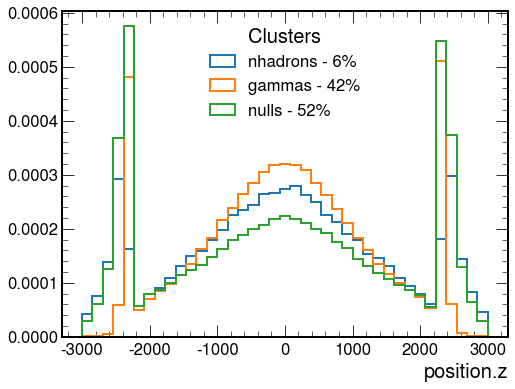

In [141]:
var_ = "position.z"

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(-3000, 3000, 40)
ax.hist(clusters.x[is_nhad][:, X_FEATURES_CL[var_]], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True,
        label=f"nhadrons - {(100*is_nhad.sum()/is_any.sum()).item():.0f}%"        
       )
ax.hist(clusters.x[is_gamma][:, X_FEATURES_CL[var_]], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True,
        label=f"gammas - {(100*is_gamma.sum()/is_any.sum()).item():.0f}%"        
       )
ax.hist(clusters.x[is_null][:, X_FEATURES_CL[var_]], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True,
        label=f"nulls - {(100*is_null.sum()/is_any.sum()).item():.0f}%"        
       )

ax.legend(title="Clusters")
ax.set_xlabel(var_);
# ax.set_yscale("log")
# ax.set_ylim(0, 25000)

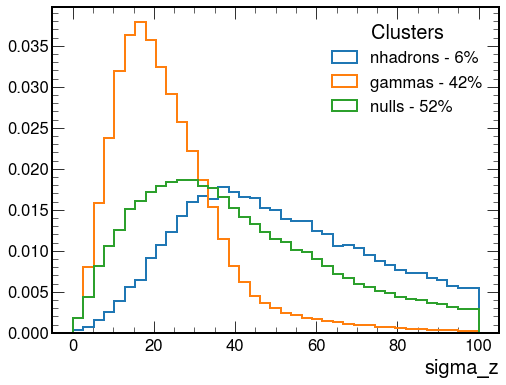

In [140]:
var_ = "sigma_z"

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(0, 100, 40)
ax.hist(clusters.x[is_nhad][:, X_FEATURES_CL[var_]], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True,
        label=f"nhadrons - {(100*is_nhad.sum()/is_any.sum()).item():.0f}%"        
       )
ax.hist(clusters.x[is_gamma][:, X_FEATURES_CL[var_]], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True,
        label=f"gammas - {(100*is_gamma.sum()/is_any.sum()).item():.0f}%"        
       )
ax.hist(clusters.x[is_null][:, X_FEATURES_CL[var_]], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True,
        label=f"nulls - {(100*is_null.sum()/is_any.sum()).item():.0f}%"        
       )

ax.legend(title="Clusters")
ax.set_xlabel(var_);
# ax.set_yscale("log")
# ax.set_ylim(0, 25000)

# Cluster exploration

In [18]:
plt.rcParams.update({"font.size": 20})

In [34]:
loader = torch_geometric.loader.DataLoader(data_, 10000000)

In [12]:
clusters = None
for i, ev in enumerate(loader):
    _, clusters_ = distinguish_tracks_from_clusters(ev)
    if clusters == None:
        clusters = clusters_.x
    else:
        clusters = torch.cat([clusters, clusters_.x], axis=0)
    if i==10:
        break

In [13]:
print(f"clusters: {clusters.shape}")

clusters: torch.Size([101083, 17])


## Tracks

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


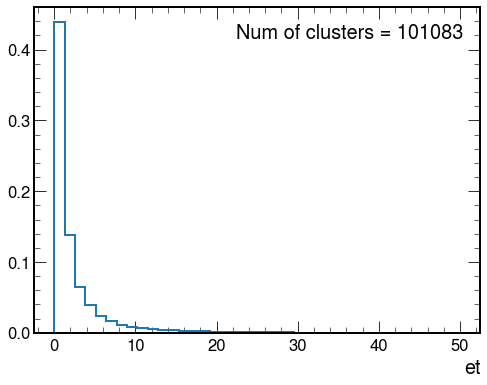

In [20]:
index_ = X_FEATURES_CL["et"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(0, 50, 40)
ax.hist(clusters[:,index_], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of clusters = {len(clusters)}")
ax.set_xlabel("et");
# ax.set_ylim(0, 25000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


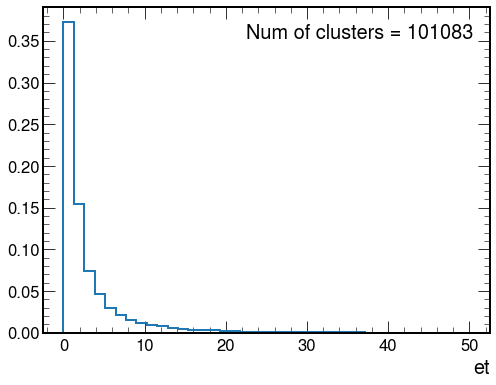

In [22]:
index_ = X_FEATURES_CL["energy"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(0, 50, 40)
ax.hist(clusters[:,index_], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of clusters = {len(clusters)}")
ax.set_xlabel("et");
# ax.set_ylim(0, 25000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


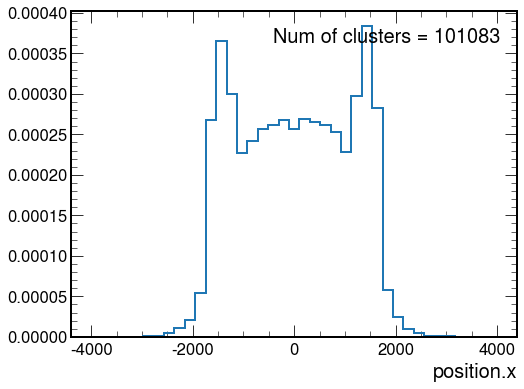

In [34]:
index_ = X_FEATURES_CL["position.x"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(-4000, 4000, 40)
ax.hist(clusters[:,index_], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of clusters = {len(clusters)}")
ax.set_xlabel("position.x");
# ax.set_ylim(0, 25000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


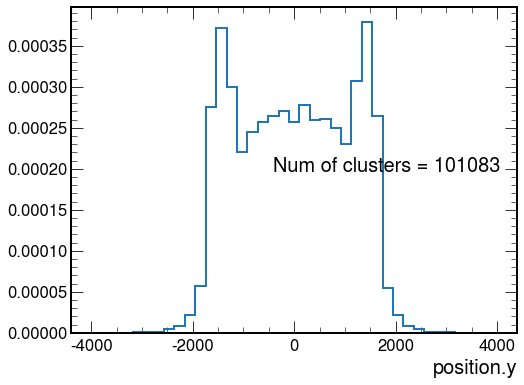

In [35]:
index_ = X_FEATURES_CL["position.y"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(-4000, 4000, 40)
ax.hist(clusters[:,index_], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of clusters = {len(clusters)}")
ax.set_xlabel("position.y");
# ax.set_ylim(0, 25000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


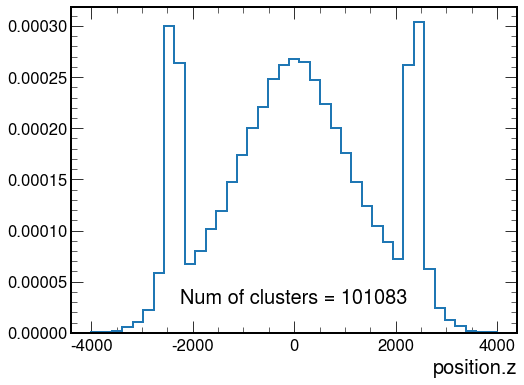

In [36]:
index_ = X_FEATURES_CL["position.z"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(-4000, 4000, 40)
ax.hist(clusters[:,index_], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of clusters = {len(clusters)}")
ax.set_xlabel("position.z");
# ax.set_ylim(0, 25000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


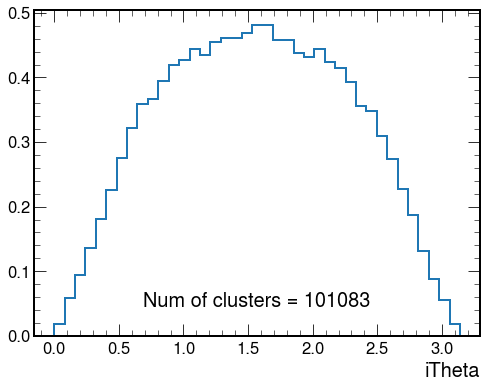

In [41]:
index_ = X_FEATURES_CL["iTheta"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(0, 3.14, 40)
ax.hist(clusters[:,index_], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of clusters = {len(clusters)}")
ax.set_xlabel("iTheta");
# ax.set_ylim(0, 25000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


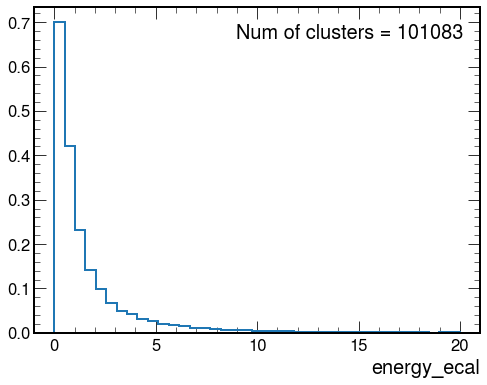

In [47]:
index_ = X_FEATURES_CL["energy_ecal"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(0, 20, 40)
ax.hist(clusters[:,index_], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of clusters = {len(clusters)}")
ax.set_xlabel("energy_ecal");
# ax.set_ylim(0, 25000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


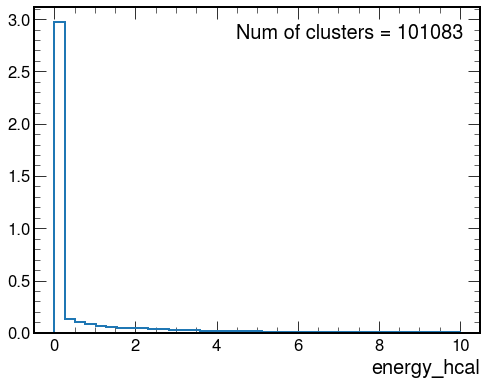

In [49]:
index_ = X_FEATURES_CL["energy_hcal"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(0, 10, 40)
ax.hist(clusters[:,index_], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of clusters = {len(clusters)}")
ax.set_xlabel("energy_hcal");
# ax.set_ylim(0, 25000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Only 625 non zero elements out of 101083


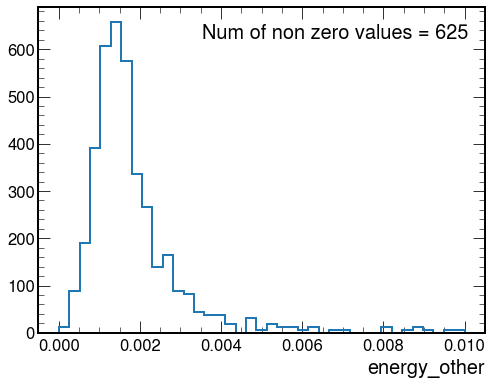

In [69]:
index_ = X_FEATURES_CL["energy_other"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(0, 0.01, 40)
ax.hist(clusters[:,index_][(clusters[:,index_]!=0)], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of non zero values = {(clusters[:,index_]!=0).sum()}")
ax.set_xlabel("energy_other");
# ax.set_ylim(0, 25000)

index_ = X_FEATURES_CL["energy_other"]
print(f"Only {(clusters[:,index_]!=0).sum()} non zero elements out of {len(clusters)}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


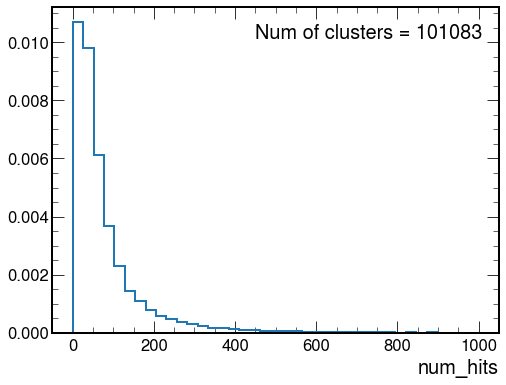

In [72]:
index_ = X_FEATURES_CL["num_hits"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(0, 1000, 40)
ax.hist(clusters[:,index_], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of clusters = {len(clusters)}")
ax.set_xlabel("num_hits");
# ax.set_ylim(0, 25000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


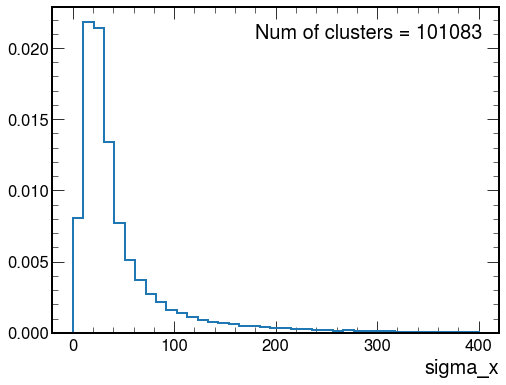

In [74]:
index_ = X_FEATURES_CL["sigma_x"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(0, 400, 40)
ax.hist(clusters[:,index_], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of clusters = {len(clusters)}")
ax.set_xlabel("sigma_x");
# ax.set_ylim(0, 25000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


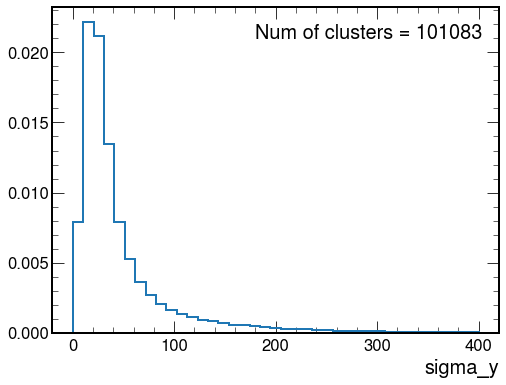

In [75]:
index_ = X_FEATURES_CL["sigma_y"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(0, 400, 40)
ax.hist(clusters[:,index_], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of clusters = {len(clusters)}")
ax.set_xlabel("sigma_y");
# ax.set_ylim(0, 25000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


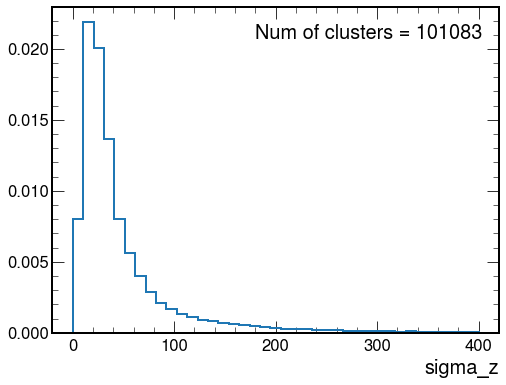

In [76]:
index_ = X_FEATURES_CL["sigma_z"]

fig, ax = plt.subplots(figsize=(8,6))

bins = np.linspace(0, 400, 40)
ax.hist(clusters[:,index_], 
        bins, 
        histtype="step", 
        linewidth=2, 
        density=True
       )

ax.legend(title=f"Num of clusters = {len(clusters)}")
ax.set_xlabel("sigma_z");
# ax.set_ylim(0, 25000)